In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cluster1 = pd.read_csv('cluster1.csv')
cluster2 = pd.read_csv('cluster2.csv')
cluster3 = pd.read_csv('cluster3.csv')

In [7]:
cluster1.columns

Index(['Unnamed: 0', 'subid', 'weekly_consumption_hour', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'male_TF_False', 'male_TF_True',
       'app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'payment_period', 'label', 'train/test'],
      dtype='object')

In [4]:
cluster1.describe()

,Unnamed: 0,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,36150.000000,3.615000e+04,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,...,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.0
mean,42983.434385,2.500854e+07,23.706231,0.567773,0.097068,0.335159,0.653444,0.240692,0.033333,0.023264,...,0.993887,0.006113,27.921964,5.848520,36.434440,58.069516,0.666030,8.337925,0.264620,0.0
std,24904.721814,2.884540e+06,2.260230,0.495392,0.296054,0.472053,0.475879,0.427509,0.179508,0.150743,...,0.077950,0.077950,57.461304,7.107048,57.950155,70.933874,3.395321,14.422161,0.526502,0.0
min,1.000000,2.000068e+07,-32.146760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,21377.250000,2.251933e+07,22.951579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.0
50%,42846.000000,2.499485e+07,24.401536,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,9.000000,3.000000,13.000000,32.000000,0.000000,2.000000,0.000000,0.0
75%,64753.250000,2.751795e+07,25.851492,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,26.000000,6.000000,39.000000,60.000000,0.000000,9.000000,0.000000,0.0
max,86114.000000,2.999982e+07,25.851492,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1260.000000,109.000000,355.000000,542.000000,128.000000,76.000000,3.000000,0.0


In [33]:
cluster1_genre = cluster1[['preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional']]
cluster1_genre = cluster1_genre.apply(pd.value_counts)
cluster1_genre = (cluster1_genre/36150).round(2)

In [34]:
cluster1_genre

,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
0,0.35,0.76,0.97,0.98,0.95
1,0.65,0.24,0.03,0.02,0.05


In [36]:
cluster1_genre_t = cluster1_genre.transpose()

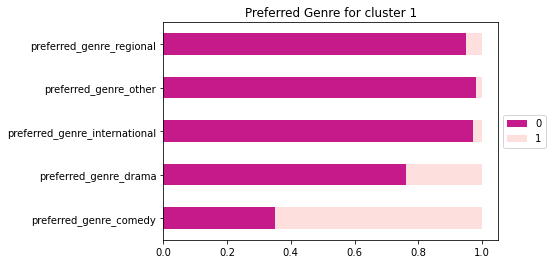

In [40]:
ax = cluster1_genre_t.plot.barh(stacked=True,color={0: "#c51b8a", 1: "#fde0dd"})
ax.set_title('Preferred Genre for cluster 1')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [52]:
con_hour = pd.DataFrame()
con_hour = cluster1[['weekly_consumption_hour']]
con_hour['cluster2'] = cluster2[['weekly_consumption_hour']]
con_hour['cluster3'] = cluster3[['weekly_consumption_hour']]
con_hour.columns = ['cluster1','cluster2','cluster3']
con_hour = con_hour.mean().to_frame()

<ipython-input-52-1b9e3818355a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_hour['cluster2'] = cluster2[['weekly_consumption_hour']]
<ipython-input-52-1b9e3818355a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_hour['cluster3'] = cluster3[['weekly_consumption_hour']]


In [54]:
con_hour.columns=['weekly_consumption_hour']

In [55]:
con_hour

,weekly_consumption_hour
cluster1,23.706231
cluster2,37.170994
cluster3,29.610105


C:\Users\Susie\anaconda3-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average Weekly Consumption Hour'}, ylabel='weekly_consumption_hour'>

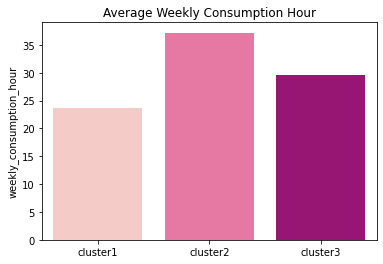

In [57]:
ax = sns.barplot(con_hour.index, y=con_hour['weekly_consumption_hour'], palette="RdPu")
ax.set_title('Average Weekly Consumption Hour')
ax

In [5]:
cluster2.describe()

,Unnamed: 0,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,10341.000000,1.034100e+04,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,...,10341.00000,10341.00000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.0
mean,43437.812010,2.497328e+07,37.170994,0.513393,0.105986,0.380621,0.546562,0.307224,0.044580,0.026593,...,0.29707,0.70293,35.866454,6.059956,41.681849,71.685040,0.705541,10.914708,0.418431,1.0
std,24798.548508,2.880075e+06,2.992661,0.499845,0.307834,0.485563,0.497851,0.461365,0.206389,0.160899,...,0.45699,0.45699,69.114113,7.082075,61.763741,80.750039,3.247948,16.776753,0.600326,0.0
min,0.000000,2.000247e+07,34.551230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,22122.000000,2.242438e+07,34.551230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,4.000000,2.000000,5.000000,17.000000,0.000000,0.000000,0.000000,1.0
50%,43225.000000,2.498578e+07,36.001186,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,1.00000,10.000000,3.000000,14.000000,36.000000,0.000000,3.000000,0.000000,1.0
75%,65107.000000,2.749074e+07,38.901099,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.00000,1.00000,38.000000,7.000000,48.000000,84.000000,0.000000,12.000000,1.000000,1.0
max,86111.000000,2.999863e+07,75.150006,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1081.000000,109.000000,331.000000,517.000000,87.000000,76.000000,3.000000,1.0


In [23]:
cluster2_genre = cluster2[['preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional']]
cluster2_genre = cluster2_genre.apply(pd.value_counts)

In [29]:
cluster2_genre = (cluster2_genre/10341).round(2)

In [41]:
cluster2_genre_t = cluster2_genre.transpose()

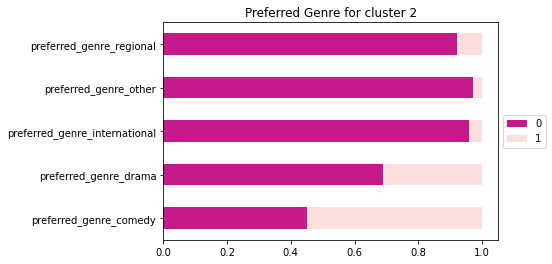

In [43]:
ax = cluster2_genre_t.plot.barh(stacked=True,color={0: "#c51b8a", 1: "#fde0dd"})
ax.set_title('Preferred Genre for cluster 2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
cluster3.describe()

,Unnamed: 0,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,39626.000000,3.962600e+04,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,...,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.0
mean,43026.907056,2.500054e+07,29.607070,0.559204,0.093247,0.347550,0.630369,0.243047,0.037652,0.027936,...,0.908419,0.091581,30.456645,5.952203,38.981603,61.858149,0.706657,9.073992,0.297052,2.0
std,24834.874855,2.888612e+06,1.906076,0.496489,0.290782,0.476198,0.482711,0.428929,0.190356,0.164792,...,0.288438,0.288438,60.148853,7.145496,60.191400,74.008219,3.616207,15.134447,0.549032,0.0
min,5.000000,2.000040e+07,26.771789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,21515.750000,2.249291e+07,27.301448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,17.000000,0.000000,0.000000,0.000000,2.0
50%,43210.000000,2.500267e+07,28.751405,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,9.000000,3.000000,14.000000,32.000000,0.000000,2.000000,0.000000,2.0
75%,64295.750000,2.751363e+07,31.651317,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,30.000000,7.000000,42.000000,63.000000,0.000000,10.000000,1.000000,2.0
max,86116.000000,2.999982e+07,33.101274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1255.000000,167.000000,333.000000,569.000000,158.000000,77.000000,3.000000,2.0


In [26]:
cluster3_genre = cluster3[['preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional']]

In [27]:
cluster3_genre =cluster3_genre.apply(pd.value_counts)

In [31]:
cluster3_genre = (cluster3_genre/39626).round(2)

In [32]:
cluster3_genre

,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
0,0.37,0.76,0.96,0.97,0.94
1,0.63,0.24,0.04,0.03,0.06


In [44]:
cluster3_genre_t = cluster3_genre.transpose()

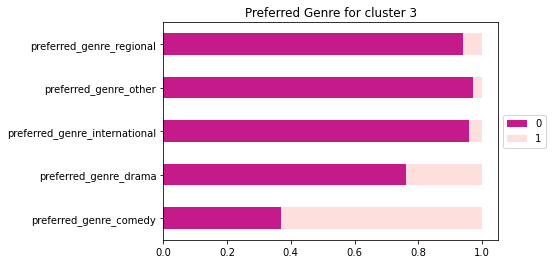

In [45]:
ax = cluster3_genre_t.plot.barh(stacked=True,color={0: "#c51b8a", 1: "#fde0dd"})
ax.set_title('Preferred Genre for cluster 3')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [59]:
video_fin = pd.DataFrame()
video_fin = cluster1[['num_videos_completed']]
video_fin['cluster2'] = cluster2[['num_videos_completed']]
video_fin['cluster3'] = cluster3[['num_videos_completed']]
video_fin.columns = ['cluster1','cluster2','cluster3']
video_fin = video_fin.mean().to_frame()
video_fin.columns=['num_videos_completed']

<ipython-input-59-97861966c579>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_fin['cluster2'] = cluster2[['num_videos_completed']]
<ipython-input-59-97861966c579>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_fin['cluster3'] = cluster3[['num_videos_completed']]


C:\Users\Susie\anaconda3-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average Number of Videos Completed'}, ylabel='num_videos_completed'>

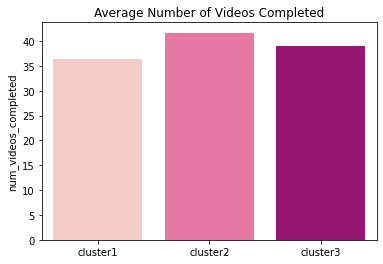

In [61]:
ax = sns.barplot(video_fin.index, y=video_fin['num_videos_completed'], palette="RdPu")
ax.set_title('Average Number of Videos Completed')
ax

<ipython-input-68-33f4b1963547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_lon['cluster2'] = cluster2[['num_videos_more_than_30_seconds']]
<ipython-input-68-33f4b1963547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_lon['cluster3'] = cluster3[['num_videos_more_than_30_seconds']]
C:\Users\Susie\anaconda3-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and 

<AxesSubplot:title={'center':'Average Number of Videos More Than 30 seconds'}, ylabel='num_videos_more_than_30_seconds'>

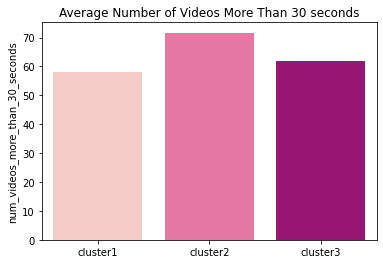

In [68]:
video_lon = pd.DataFrame()
video_lon = cluster1[['num_videos_more_than_30_seconds']]
video_lon['cluster2'] = cluster2[['num_videos_more_than_30_seconds']]
video_lon['cluster3'] = cluster3[['num_videos_more_than_30_seconds']]
video_lon.columns = ['cluster1','cluster2','cluster3']
video_lon = video_lon.mean().to_frame()
video_lon.columns=['num_videos_more_than_30_seconds']

ax = sns.barplot(video_lon.index, y=video_lon['num_videos_more_than_30_seconds'], palette="RdPu")
ax.set_title('Average Number of Videos More Than 30 seconds')
ax

<ipython-input-69-f6e0e82ea688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['cluster2'] = cluster2[['app_opens']]
<ipython-input-69-f6e0e82ea688>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['cluster3'] = cluster3[['app_opens']]
C:\Users\Susie\anaconda3-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

<AxesSubplot:title={'center':'Average Times of APP Opens'}, ylabel='app_opens'>

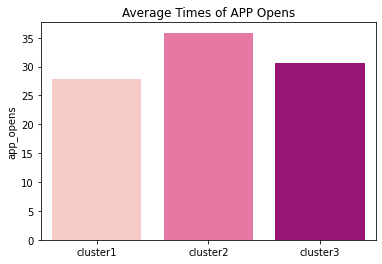

In [69]:
app = pd.DataFrame()
app = cluster1[['app_opens']]
app['cluster2'] = cluster2[['app_opens']]
app['cluster3'] = cluster3[['app_opens']]
app.columns = ['cluster1','cluster2','cluster3']
app = app.mean().to_frame()
app.columns=['app_opens']

ax = sns.barplot(app.index, y=app['app_opens'], palette="RdPu")
ax.set_title('Average Times of APP Opens')
ax

In [70]:
gender = pd.DataFrame()
gender = cluster1[['male_TF_True']]
gender['cluster2'] = cluster2[['male_TF_True']]
gender['cluster3'] = cluster3[['male_TF_True']]
gender.columns = ['cluster1','cluster2','cluster3']

<ipython-input-70-687daf1c8d30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender['cluster2'] = cluster2[['male_TF_True']]
<ipython-input-70-687daf1c8d30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender['cluster3'] = cluster3[['male_TF_True']]


In [72]:
gender =gender.apply(pd.value_counts)

In [75]:
gender['cluster1'] = (gender['cluster1']/cluster1.shape[0]).round(2)
gender['cluster2'] = (gender['cluster2']/cluster1.shape[0]).round(2)
gender['cluster3'] = (gender['cluster3']/cluster1.shape[0]).round(2)

In [81]:
gender

,cluster1,cluster2,cluster3
0.0,0.99,0.08,0.91
1.0,0.01,0.20,0.09


In [78]:
gender_t = gender.transpose()

In [82]:
gender_t

,0.0,1.0
cluster1,0.99,0.01
cluster2,0.08,0.20
cluster3,0.91,0.09


In [83]:
gender_t.columns = ['Female','Male']

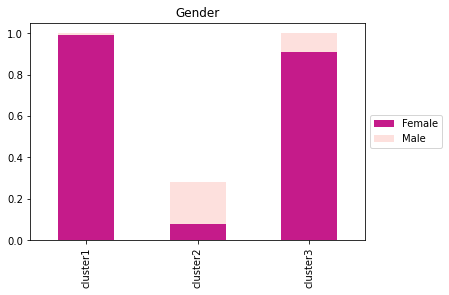

In [85]:
ax = gender_t.plot.bar(stacked=True,color={'Female': "#c51b8a", 'Male': "#fde0dd"})
ax.set_title('Gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))